In [ ]:
import torch

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

In [ ]:
print("size:",x.size())
print("shape:",x.shape)
print("rank:",x.ndimension())


In [13]:
x = torch.unsqueeze(x,0)
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("rank:",x.ndimension())


tensor([[[[[[[[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]]]]]]])
size: torch.Size([1, 1, 1, 1, 1, 1, 3, 3])
shape: torch.Size([1, 1, 1, 1, 1, 1, 3, 3])
rank: 8


In [15]:
x= torch.squeeze(x)
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("rank:",x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size: torch.Size([3, 3])
shape: torch.Size([3, 3])
rank: 2


In [16]:
x=x.view(9)
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("rank:",x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size: torch.Size([9])
shape: torch.Size([9])
rank: 1


In [19]:
try:
    x=x.view(3,3)
except Exeption as e:
    print(e)

In [21]:
print(x)


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [23]:
w = torch.randn(5,3,dtype=torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print("w size:" ,w.size())
print("x size:",x.size())
print("w:",w)
print("x:",x)


w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-1.0574, -0.3425,  0.2304],
        [ 0.2014, -0.4443, -0.1449],
        [ 1.2115,  0.8775, -1.1208],
        [-0.6597, -0.0600,  1.1365],
        [-0.3768, -1.0009,  0.1883]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [25]:
wx= torch.mm(w,x)
print("wx size:",wx.size())
print("wx:",wx)

wx size: torch.Size([5, 2])
wx: tensor([[-0.9329, -2.1024],
        [-1.8558, -2.2436],
        [-1.7599, -0.7917],
        [ 4.8426,  5.2594],
        [-2.4377, -3.6270]])


In [26]:
b = torch.randn(5,2,dtype=torch.float)
print("b:",b.size())
print("b:",b)

b: torch.Size([5, 2])
b: tensor([[-1.2848,  0.1510],
        [-1.0607,  1.5042],
        [ 0.0533, -1.7406],
        [-0.7371, -0.0717],
        [ 0.1079,  0.6747]])


In [27]:
result = wx+b
print("result size:",result.size())
print("result:",result)

result size: torch.Size([5, 2])
result: tensor([[-2.2177, -1.9513],
        [-2.9165, -0.7394],
        [-1.7066, -2.5323],
        [ 4.1055,  5.1877],
        [-2.3298, -2.9523]])


In [31]:
#경사하강법

w = torch.tensor(1.0,requires_grad =True)
a= w*3
l=a**2
l.backward()
print('1을 w로 미분한 값은 {}'.format(w.grad))

1을 w로 미분한 값은 18.0


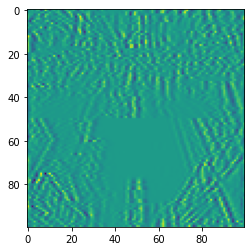

In [46]:
#경사하강법을 이용한 이미지 복원
import torch
import pickle
import matplotlib.pyplot as plt
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding = 'latin1'))
plt.imshow(broken_image.view(100,100))

In [99]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [100]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [101]:
random_tensor = torch.rand(10000,dtype = torch.float)

In [110]:
lr = 0.01
for i in range(0,50000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.0002584604371804744
Loss at 1000 = 0.0002585998736321926
Loss at 2000 = 0.00025871038087643683
Loss at 3000 = 0.0002588253701105714
Loss at 4000 = 0.000258949730778113
Loss at 5000 = 0.0002590264775790274
Loss at 6000 = 0.000259140768321231
Loss at 7000 = 0.0002592004311736673
Loss at 8000 = 0.0002592890232335776
Loss at 9000 = 0.0002593078534118831
Loss at 10000 = 0.00025922968052327633
Loss at 11000 = 0.00025920741609297693
Loss at 12000 = 0.00025934039149433374
Loss at 13000 = 0.000259378575719893
Loss at 14000 = 0.00025939883198589087
Loss at 15000 = 0.0002592681266833097
Loss at 16000 = 0.0002593870449345559
Loss at 17000 = 0.0002594159741420299
Loss at 18000 = 0.0002595925470814109
Loss at 19000 = 0.0002597050915937871
Loss at 20000 = 0.00025978090707212687
Loss at 21000 = 0.00025981583166867495
Loss at 22000 = 0.0002599185681901872
Loss at 23000 = 0.00026008463464677334
Loss at 24000 = 0.0002600149891804904
Loss at 25000 = 0.00025980063946917653
Loss at 26000 = 0.0

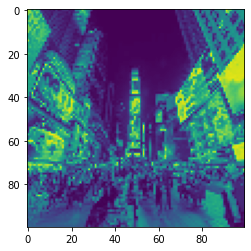

In [111]:
plt.imshow(random_tensor.view(100,100).data)